In [87]:
#   Term Frequency - Inverse Document Frequency

In [88]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
data = pd.read_csv('Womens_Clothing_E-Commerce_Reviews.csv') # Loading the dataset
data = data.dropna(subset=['Review Text', 'Recommended IND']) # question

In [90]:
def shuffling(texts, labels):
    np.random.seed(1111)
    ind_shuffled = np.random.permutation(len(texts))
    texts_shuffled = texts[ind_shuffled]
    labels_shuffled = labels[ind_shuffled]
    return texts_shuffled, labels_shuffled

def partitioning(texts_shuffled, labels_shuffled):
    num_valid = int(len(texts_shuffled) * 0.2)  # 20% for validation
    texts_valid = texts_shuffled[:num_valid]
    labels_valid = labels_shuffled[:num_valid]
    texts_train = texts_shuffled[num_valid:]
    labels_train = labels_shuffled[num_valid:]
    return texts_train, labels_train, texts_valid, labels_valid

In [91]:
# Shuffle and partition the data
texts_shuffled, labels_shuffled = shuffling(data['Review Text'].values, data['Recommended IND'].values)
texts_train, labels_train, texts_valid, labels_valid = partitioning(texts_shuffled, labels_shuffled)

In [92]:
# TF-IDF Vectorization

# Tokenise words

tfidf_vectorizer = TfidfVectorizer(max_features=1000, min_df=5, max_df=0.7, stop_words='english')
#                                                     min/ max document frequency
#                                                                   # stop_words => basic english words to ignore
# => Training Accuracy: 0.8975873681885939
#    Validation Accuracy: 0.8873674911660777

# Tokenise characters 
#tfidf_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(4, 6), max_features=1000, min_df=5, max_df=0.7)
# => Training Accuracy: 0.8784850659747143
#    Validation Accuracy: 0.8714664310954063

X_train_tfidf = tfidf_vectorizer.fit_transform(texts_train)
X_valid_tfidf = tfidf_vectorizer.transform(texts_valid)

In [93]:
# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, labels_train)

# Make predictions
train_predictions = model.predict(X_train_tfidf)
validation_predictions = model.predict(X_valid_tfidf)

# Check accuracy
training_accuracy = accuracy_score(labels_train, train_predictions)
validation_accuracy = accuracy_score(labels_valid, validation_predictions)

print(f"Training Accuracy: {training_accuracy}")
print(f"Validation Accuracy: {validation_accuracy}")

Training Accuracy: 0.8975873681885939
Validation Accuracy: 0.8873674911660777


In [ ]:
# Plot the relationship between words (features) and their impact (coefficients)

# Hand - selected focuses only on whether the words are present, not taking into account the frequency 
#        or the relative importance of these words within the document or the entire collection of documents.

# TF - IDF weighs each word's frequency in a document against its frequency across all documents

In [108]:
# Retrieve tokens - words
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

# Retrieve coefficients associated with each token
coefficients = model.coef_.flatten()

# Pair coefficients with tokens
words_and_coeffs = list(zip(feature_names, coefficients))
words_and_coeffs = sorted(words_and_coeffs, key=lambda x: x[1], reverse=True)

# Top positive coefficients
top_positive_words = words_and_coeffs[:5]

# Top negative coefficients
top_negative_words = words_and_coeffs[-5:]

# Convert to DataFrame for plotting
df_positive = pd.DataFrame(top_positive_words, columns=['Token', 'Coefficient'])
df_negative = pd.DataFrame(top_negative_words, columns=['Token', 'Coefficient'])


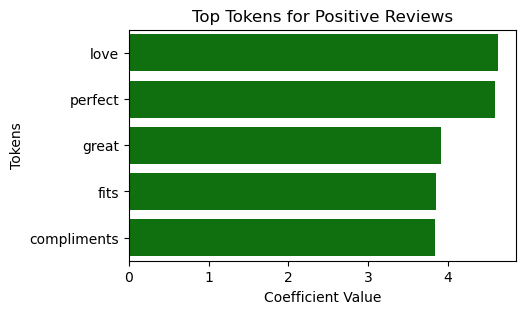

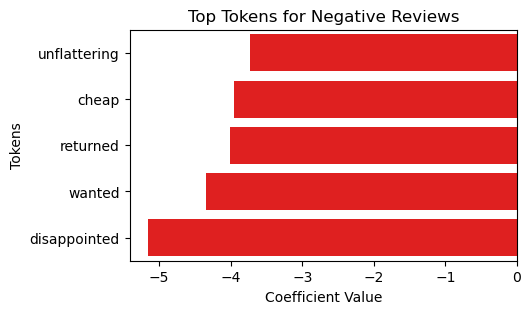

In [109]:

# Top Positive tokens
plt.figure(figsize=(5, 3))
df_positive = pd.DataFrame(top_positive_words, columns=['Token', 'Coefficient'])
sns.barplot(x='Coefficient', y='Token', data=df_positive, color='green')
plt.title('Top Tokens for Positive Reviews')
plt.xlabel('Coefficient Value')
plt.ylabel('Tokens')
plt.show()

# Top Negative tokens
plt.figure(figsize=(5, 3))
df_negative = pd.DataFrame(top_negative_words, columns=['Token', 'Coefficient'])
sns.barplot(x='Coefficient', y='Token', data=df_negative, color='red')
plt.title('Top Tokens for Negative Reviews')
plt.xlabel('Coefficient Value')
plt.ylabel('Tokens')
plt.show()